In [70]:
import pickle
import pandas as pd
import numpy as np

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(color_codes=True)
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
bjt = pd.read_pickle("../bdc/hjt_cleaned_slim.pickle")

In [3]:
with open("../bdc/hjt_map_dict.pickle", "r") as p:
    section_id_info = pickle.load(p)

In [4]:
section_id_info

{'00001': {'description': 'M32 Newfoundland Circus IB to Old Market St West WB',
  'id': 'SECTIONTL00001',
  'location': (51.457, -2.583)},
 '0001': {'description': 'M32 Newfoundland Circus IB to Old Market St West WB',
  'id': 'SECTIONTL0001',
  'location': (51.4594, -2.584)},
 '00022': {'description': 'Old Market St West EB to M32 Newfoundland Circus OB',
  'id': 'SECTIONTL00022',
  'location': (51.457, -2.587)},
 '00028': {'description': 'Victoria St SB to Old Market St East OB',
  'id': 'SECTIONTL00028',
  'location': (51.452, -2.587)},
 '0003': {'description': 'M32 Newfoundland Circus IB to Avon St OB',
  'id': 'SECTIONTL0003',
  'location': (51.456, -2.584)},
 '00030': {'description': 'Victoria St SB to Bath Rd/ Three Lamps OB',
  'id': 'SECTIONTL00030',
  'location': (51.448, -2.581)},
 '00036': {'description': 'Redcliffe Way West IB to Coronation Rd OB',
  'id': 'SECTIONTL00036',
  'location': (51.448, -2.59)},
 '0004': {'description': 'M32 Newfoundland Circus IB to Bond St at 

In [168]:
for i in section_id_info:
    # Get average distance
    n = bjt[bjt.section_id == i]
    nn = n.est_speed * n.travel_time
    section_id_info[i]["speed"] = (nn.mean(), nn.std())
    section_id_info[i]["speed_time_corr"] = n[["travel_time", "est_speed"]].corr().as_matrix()[0,1]

In [169]:
lookup_id = pd.DataFrame(section_id_info).T
lookup_id.to_pickle("../bdc/lookup_id.pickle")

In [170]:
lookup_id.head()

,description,id,location,speed,speed_time_corr
00001,M32 Newfoundland Circus IB to Old Market St We...,SECTIONTL00001,"(51.457, -2.583)","(643.717241375, 0.225057545639)",-0.77415
0001,M32 Newfoundland Circus IB to Old Market St We...,SECTIONTL0001,"(51.4594, -2.584)","(643.721505232, 0.181592560063)",-0.735268
00022,Old Market St West EB to M32 Newfoundland Circ...,SECTIONTL00022,"(51.457, -2.587)","(643.721816782, 0.213447515222)",-0.823264
00028,Victoria St SB to Old Market St East OB,SECTIONTL00028,"(51.452, -2.587)","(2253.08578856, 0.339723465536)",-0.856619
0003,M32 Newfoundland Circus IB to Avon St OB,SECTIONTL0003,"(51.456, -2.584)","(1126.5430321, 0.253440098784)",-0.764778


In [189]:
new_index_n = []
new_index_z = []
for i in lookup_id.index:
    empty = int(i)
    zeros = len(i)
#     empty += "_%dx0" % zeros
    new_index_n.append(empty)
    new_index_z.append(zeros)
lookup_id["index_n"] = new_index_n
lookup_id["index_z"] = new_index_z

In [172]:
s = lookup_id.columns.tolist()
s = [s[5]] + [s[6]] + [s[1]] + [s[0]] + [s[2]] + [s[3]] + [s[4]]
s
lookup_id = lookup_id[s]

In [190]:
lookup_id.sort(["index_n", "index_z"])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,index_n,index_z,id,description,location,speed,speed_time_corr
0001,1,4,SECTIONTL0001,M32 Newfoundland Circus IB to Old Market St We...,"(51.4594, -2.584)","(643.721505232, 0.181592560063)",-0.735268
00001,1,5,SECTIONTL00001,M32 Newfoundland Circus IB to Old Market St We...,"(51.457, -2.583)","(643.717241375, 0.225057545639)",-0.77415
0003,3,4,SECTIONTL0003,M32 Newfoundland Circus IB to Avon St OB,"(51.456, -2.584)","(1126.5430321, 0.253440098784)",-0.764778
0004,4,4,SECTIONTL0004,M32 Newfoundland Circus IB to Bond St at Glouc...,"(51.459, -2.585)","(643.734554016, 0.678530938919)",-0.741327
0011,11,4,SECTIONTL0011,Bond St at Gloucester St EB to M32 Newfoundlan...,"(51.46, -2.585)","(643.741174223, 0.358508703128)",-0.741507
0012,12,4,SECTIONTL0012,Old Market St East IB to M32 Newfoundland Circ...,"(51.458, -2.585)","(643.756190257, 0.724430142728)",-0.811347
0014,14,4,SECTIONTL0014,Old Market St East IB to Avon St OB,"(51.453, -2.584)","(482.812566247, 0.640852979787)",-0.714245
0015,15,4,SECTIONTL0015,Old Mkt East IB to Cattlemarket Rd OB,"(51.448, -2.585)","(1126.52843057, 0.586628495971)",-0.85916
0021,21,4,SECTIONTL0021,Old Market St West EB to Bond St at Gloucester...,"(51.4594, -2.586)","(643.717439781, 0.492165020153)",-0.713224
0022,22,4,SECTIONTL0022,Old Market St West EB to M32 Newfoundland Circ...,"(51.4594, -2.585)","(643.724555409, 0.636673832371)",-0.695392


In [10]:
bjt[bjt.isnull().any(axis=1)]
# Apparently no null values

,section_id,time,est_speed,travel_time


In [233]:
# a, b = "00127", "00063" # 1, 73, 63, 46, 36

# print bjt[bjt.section_id == a].time.min()
# print bjt[bjt.section_id == a].time.max()
# print "------------"
# print bjt[bjt.section_id == b].time.min()
# print bjt[bjt.section_id == b].time.max()

# Merge data form the same source but with different ID
seen = []
double = []
for x in lookup_id.index_n.values:
    if x not in seen:
        seen.append(x)
    else:
        double.append(x)
for d in double:
    d = lookup_id[lookup_id.index_n == d].index.values[0]
    da = d[0]
    db = d[1]
    bjt.ix[bjt.section_id==db, "section_id"] = da

In [242]:
for d in seen:
    d = lookup_id[lookup_id.index_n == d].index.values[0]
    df = bjt[bjt.section_id == d].sort("time")
    df["time"] = df["time"].apply(in100)
    s = df[["time", "est_speed"]]
    t = df[["time", "travel_time"]]
    
    s.to_csv("../notebooks/%s_%s.csv" % (d, "speed"), index=False)
    t.to_csv("../notebooks/%s_%s.csv" % (d, "time"), index=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


# Plots#

In [211]:
def minmax(n):
    n_min, n_max = 1428000000+350000, 1428000000+400000 #1430000000
    if n_min <= n and n <= n_max:
        return True
    else:
        return False
def in100(d):
    return int(d*1000)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


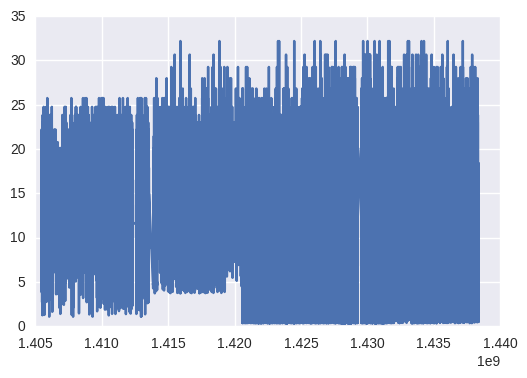

In [212]:
# sns.tsplot(data=)
# speed = bjt[bjt["section_id"] == "0001"][bjt["time"].map(minmax)][["time", "est_speed"]].sort("time")
speed = bjt[bjt["section_id"] == "0004"][["time", "est_speed"]].sort("time")

speed_mx = speed.as_matrix()
plt.plot( speed_mx[:,0], speed_mx[:,1] )
plt.show()

In [210]:
speed["time"] = speed["time"].apply(in100)
speed.to_csv("../notebooks/foo.csv", index=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


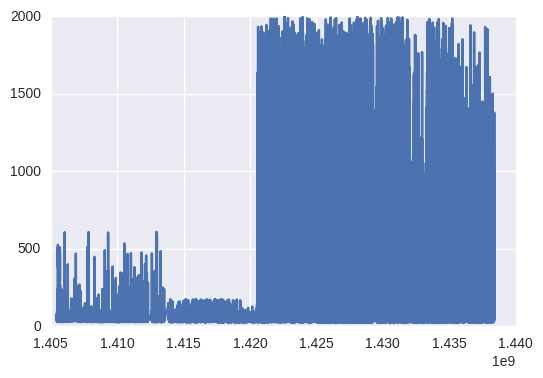

In [213]:
time = bjt[bjt["section_id"] == "0004"][["time", "travel_time"]].sort("time")

time_mx = time.as_matrix()
plt.plot( time_mx[:,0], time_mx[:,1] )
plt.show()

In [214]:
time["time"] = time["time"].apply(in100)
time.to_csv("../notebooks/bar.csv", index=False)

In [350]:
# get accidents
with open("../bdc/acc_time_by_location.pickle", "r") as p:
    acc = pickle.load(p)

In [351]:
acc

{'00001': [1392724800,
  1391601600,
  1392465600,
  1396958400,
  1396958400,
  1395316800,
  1404216000,
  1402401600,
  1407931200,
  1407067200,
  1413979200,
  1418212800,
  1419249600,
  1418558400,
  1421496000,
  1423396800,
  1428840000,
  1431604800,
  1429531200,
  1430568000,
  1434628800,
  1441800000,
  1442232000,
  1442923200,
  1431432000,
  1448539200,
  1449057600],
 '0001': [1389787200,
  1389614400,
  1398772800,
  1402660800,
  1403956800,
  1402228800,
  1408363200,
  1406030400,
  1411473600,
  1413115200,
  1412251200,
  1416916800,
  1421496000,
  1423051200,
  1426939200,
  1430740800,
  1430740800,
  1441368000,
  1440244800,
  1446120000,
  1446811200,
  1447761600],
 '00022': [1416139200,
  1391256000,
  1391774400,
  1393934400,
  1391774400,
  1393070400,
  1398859200,
  1394971200,
  1395230400,
  1397649600,
  1403956800,
  1403611200,
  1403784000,
  1402660800,
  1406635200,
  1408104000,
  1406894400,
  1404734400,
  1409918400,
  1407844800,
  1411

# PLOTS #

In [392]:
PLOT = """
<html>
<head>
<title>%s</title>
    <link rel="stylesheet" href="../css/my.css">
   <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
   <script src="https://code.highcharts.com/stock/highstock.js"></script>
   <script src="https://code.highcharts.com/stock/modules/exporting.js"></script>
</head>
<body bgcolor="#44a0dd">
<a href="../#/list_of_plots" class="button"> List of Plots </a>

%s

</body>
</html>
"""

TEMPLATE_HTML = """
<html>
<head>
<title>Bristol Travel Times</title>
    <link rel="stylesheet" href="css/reveal.css">
    <link rel="stylesheet" href="css/my_theme.css">
    <link rel="stylesheet" href="css/my.css">
    <script src="lib/underscore.js"></script>
    <script src="js/mapper.js"></script>
   <script src="js/reveal.js"></script>
   <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
   <script src="https://code.highcharts.com/stock/highstock.js"></script>
   <script src="https://code.highcharts.com/stock/modules/exporting.js"></script>
</head>
<body>
    <div class="reveal">
      <div class="slides">

        <section>
          <div style="width: 960px; top: 0px; margin: auto;"><!-- position: absolute;-->
                <h1 style="font-size: 250px;">Uo<img style="vertical-align: middle;" src="img/hbrain.png">rain</h1>
          </div>
          <div style="width: 800px; left: 0px; top: 0px; height: auto; margin: auto; margin-top: 50px;">
              <h2 style="font-size: 50px;">Neural model of the University of Bristol researchers and their work</h2>
         </div>
          <div style="width: 960px; bottom: 0em; font-size: 20px;">
              Kacper Sokol
         </div>
      </section>
      <section>
        <section>
          <h1>Data</h1>
        </section>
        %s
      </section>

    </div>
  </div>

    <script>
      Reveal.initialize({
        width: 960,
        height: 700,
        minScale: 1,
        maxScale: 1,
        center: true,
        controls: true,
        progress: true,
        history: true,
        overview: true,
        transition: 'fade', // none/fade/slide/convex/concave/zoom
        transitionSpeed: 'default', // default/fast/slow
        backgroundTransition: 'convex' // none/fade/slide/convex/concave/zoom
      });
    </script>

%s

</body>
</html>
"""
LINES = """
,plotLines: [
%s
]
"""
BAR = """
        {
          color: 'red',
          dashStyle: 'longdashdot',
          value: %d,
          width: 1
        },
"""
TEMPLATE_JS = """
<script language="JavaScript">
$(document).ready(function() {
    // Define and initialize "options"
    options%d = {
       chart: {
            renderTo: '%s',
            zoomType: 'x'
       },
       title: { text: '%s' },
       xAxis: { type: 'datetime', ordinal: false %s },
       yAxis: { title: { text: '%s' }//,
        //min: 0, max: 15,
        //plotLines: [{
        //  color: 'red',
        //  dashStyle: 'longdashdot',
        //  value: 13.4112,
        //  width: 1
        //},
        //{
        //  color: 'blue',
        //  dashStyle: 'longdashdot',
        //  value: 8.9408,
        //  width: 1
        //}
        //],
       },
       series: []
    };

    // Read datafile
    $.get('%s', function(data) {
        var series%d = { data: [], name: '%s' };
        // Split the lines
        var lines = data.split('\\n');
        // Slit each line into items separated by commas
        $.each(lines, function(lineNo, line) {
            var items = line.split(',');
            // Add 3600 for timezone offset and multiply by 1000 to have time in ms
            t=parseInt(items[0]);
            val1=parseFloat(items[1]);
            // Add to series if conversion was successful
            if(!isNaN(val1)) series%d.data.push([t, val1]);
        });

        // Push the completed series
        options%d.series.push(series%d);
        // Create the plot
        new Highcharts.stockChart(options%d);
    });
});
</script>
"""

In [393]:
sections = ""
jss = ""
for i, d in enumerate(seen):
    divs = ""
    djs = ""
    d = lookup_id[lookup_id.index_n == d].index.values[0]

    verbar = ""
    for j in acc.get(d, []) + acc.get(d[1:], []):
        verbar += BAR % (j*1000)
    if verbar:
        verbar = LINES % verbar[:-1]
        
    dt = d+"_time"
    ds = d+"_speed"
    sections += '<section><div id="%s" style="top: 50px; left: 80px; position: fixed; width: 800px; height: 600px; margin: 0 auto"></div></section>\n' % dt
    sections += '<section><div id="%s" style="top: 50px; left: 80px; position: fixed; width: 800px; height: 600px; margin: 0 auto"></div></section>\n' % ds
    divs += '<div id="%s" style="width: 800px; height: 600px; margin: 125 auto"></div>\n' % dt
    divs += '<div id="%s" style="width: 800px; height: 600px; margin: 125 auto"></div>\n' % ds
    jss += TEMPLATE_JS % (i, dt, "Time in second (section %s)"%d, verbar, "Time (s)", "data/%s.csv"%dt, i, "Time taken to sross section %s"%d, i, i, i, i)
    jss += TEMPLATE_JS % (i+100, ds, "Speed in meters per second (section %s)"%d, verbar, "Speed (m/s)", "data/%s.csv"%ds, i+100, "Speed at section %s"%d, i+100, i+100, i+100, i+100)
    djs += TEMPLATE_JS % (i, dt, "Time in second (section %s)"%d, verbar, "Time (s)", "../data/%s.csv"%dt, i, "Time taken to sross section %s"%d, i, i, i, i)
    djs += TEMPLATE_JS % (i+100, ds, "Speed in meters per second (section %s)"%d, verbar, "Speed (m/s)", "../data/%s.csv"%ds, i+100, "Speed at section %s"%d, i+100, i+100, i+100, i+100)

    with open("singles/%s.html"%d, "w") as ht:
        ht.write(PLOT % (d, (divs+djs)))

#     break
with open("../notebooks/index1.html", "w") as ht:
    ht.write(TEMPLATE_HTML % (sections, jss))

In [397]:
grid = """
        <section id="list_of_plots">
        <table>
%s
        </table>
        </section>
"""
z = ""
for i, d in enumerate(seen):
    d = lookup_id[lookup_id.index_n == d].index.values[0]
    if i%6 == 0:
        z+= "\n</tr>\n<tr>\n"
    z += "<td><a class=\"tb\" href=\"sections/%s.html\">%s</a></td>\n" % (d, d)
with open("../notebooks/index.html", "w") as ht:
    ht.write(TEMPLATE_HTML % (grid%z, ""))

In [394]:
len(seen)

51

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

In [271]:
from datetime import datetime
def toDay(d):
    return datetime.fromtimestamp(d).strftime("%A")
def toH(d):
    return datetime.fromtimestamp(d).strftime("%H")
def toD(d):
    return datetime.fromtimestamp(d).strftime("%d")
def toMon(d):
    return datetime.fromtimestamp(d).strftime("%b")
def toYear(d):
    return datetime.fromtimestamp(d).strftime("%y")
bjt["hour"] = bjt["time"].apply(toH)
bjt["day_of_week"] = bjt["time"].apply(toDay)
bjt["day"] = bjt["time"].apply(toD)
bjt["month"] = bjt["time"].apply(toMon)
bjt["year"] = bjt["time"].apply(toYear)
# bjt.head()

In [364]:
bjt.head()

,section_id,time,est_speed,travel_time,day,hour,day_of_week,month,year
1,0004,1.405451e+09,15.329002,42.0,15,19,Tuesday,Jul,14
2,0011,1.405451e+09,12.624410,51.0,15,19,Tuesday,Jul,14
3,0012,1.405451e+09,1.305357,493.0,15,19,Tuesday,Jul,14
4,00028,1.405450e+09,1.689811,1335.0,15,18,Tuesday,Jul,14
5,00030,1.405451e+09,10.885424,207.0,15,19,Tuesday,Jul,14


In [385]:
# bjt[bjt.section_id == "0004"].head()
import time, datetime
def in_date(d):
    xd = "01/10/2014 00:00:00" # "01/01/2015 00:00:00"
    yd = "31/12/2014 23:59:59"
    x = time.mktime(datetime.datetime.strptime(xd, "%d/%m/%Y %H:%M:%S").timetuple())
    y = time.mktime(datetime.datetime.strptime(yd, "%d/%m/%Y %H:%M:%S").timetuple())
    if d >= x and d <= y:
        return True
    else:
        return False
    
# ll = bjt[bjt.section_id == "0004"].groupby(['year', 'day_of_week', 'hour'])["travel_time"].mean() # 'year', 'month', 'month', 'day_of_week', 'hour' 
ll = bjt[bjt.section_id == "00036"]
# [ll["time"].map(in_date)]
ll = ll.groupby(['year', 'day_of_week', 'hour'])["travel_time"].mean() # 'year', 'month', 'month', 'day_of_week', 'hour' 

In [386]:
night = ["20", "21", "22", "23"]
prev_night = ["00", "01", "02", "03", "04", "05", "06"]
morning = ["07", "08"]
afternoon = ["09", "10", "11", "12", "13", "14"]
evening = ["15", "16", "17", "18", "19"]
# night = ["21", "22", "23", "00", "01", "02", "03", "04"]
# morning = ["05", "06", "07", "08"]
# afternoon = ["09", "10", "11", "12", "13", "14"]
# evening = ["15", "16", "17", "18", "19", "20"]
yyyy = "14"
dw = {}
wwks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i in wwks:
    dw[i] = {"night":[], "morning":[], "afternoon":[], "evening":[]}
for i in ll[yyyy].index.levels[0]:
    for j in ll[yyyy][i].index:
        if j in night:
            dw[i]["night"].append(ll[yyyy][i][j])
        elif j in morning:
            dw[i]["morning"].append(ll[yyyy][i][j])
        elif j in evening:
            dw[i]["evening"].append(ll[yyyy][i][j])
        elif j in afternoon:
            dw[i]["afternoon"].append(ll[yyyy][i][j])
        elif j in prev_night:
            dw[wwks[(wwks.index(i)-1)%7]]["night"].append(ll[yyyy][i][j])
        else:
            print "error"

In [389]:
for j, jj in zip(["morning", "afternoon", "evening", "night"], [" 07-08", " 09-14", " 15-19", " 20-06"]):
    k = []
    for i in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
        k.append(np.mean(dw[i][j]))
    print "{\n        name: '%s',\n        data: %s\n}," % (j+jj, str(k))

{
        name: 'morning 07-08',
        data: [165.8969109630527, 169.73487841945291, 192.39221014492753, 177.79873279098874, 160.31826241134752, 112.61266628108734, 98.321419550391511]
},
{
        name: 'afternoon 09-14',
        data: [136.42410573634714, 133.60060813120219, 136.50168793085979, 141.2102561196069, 145.273968726758, 134.49887407227871, 123.957896709991]
},
{
        name: 'evening 15-19',
        data: [143.72311183259262, 161.13790451712126, 156.93374178688663, 166.09330866530559, 171.0950117647059, 125.97787189991327, 115.48262801252137]
},
{
        name: 'night 20-06',
        data: [94.092998728806748, 98.024186563424792, 97.469407390138215, 95.400626845448457, 91.724408798348605, 96.19801218691758, 90.95967540626431]
},


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

In [457]:
BB_PLOT = """
<html>
<head>
<title>%s</title>
    <link rel="stylesheet" href="../css/my.css">
   <script src="https://ajax.googleapis.com/ajax/libs/jquery/2.1.3/jquery.min.js"></script>
   <script src="https://code.highcharts.com/stock/highstock.js"></script>
   <script src="https://code.highcharts.com/stock/modules/exporting.js"></script>
</head>
<body bgcolor="#44a0dd">
<a href="../#/rain" class="button"> List of Plots </a>
<div id="container" style="min-width: 310px; max-width: 800px; height: 600px; margin: 125 auto"></div>

  <script>
Highcharts.chart('container', {
    title: {
        text: 'Average monthly travel times'
    },
    subtitle: {
        text: '%s'
    },
    xAxis: {
        categories: %s
    },
    series: [{
        type: 'column',
        name: 'Average Rainfall',
        data: %s
    }, {
        type: 'column',
        name: '%s',
        data: %s
    }
    //, {
    //    type: 'spline',
    //    name: 'Average',
    //    data: %s,
    //    marker: {
    //        lineWidth: 2,
    //        lineColor: Highcharts.getOptions().colors[0],
    //        fillColor: 'red'
    //    }
    //}
    ]
});
  </script>
</body>
</html>

"""

In [458]:
months_m = list(set(bjt.month.values))
months_m = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
rain = [90,70,90,40,70,50,40,70,80,90,100,80]
rain_mean = np.mean(rain)

In [492]:
raining_man = {}
for d in seen:
    d = lookup_id[lookup_id.index_n == d].index.values[0]

    md = []
    mv = []
    months_non_zero = []
    for i, j in zip(months_m, rain):
        md.append(i)
        m = bjt[bjt.section_id == d][bjt.month == i]["travel_time"].mean()
        mv.append(m)
        if pd.notnull(m):
            months_non_zero.append(j)
    #     print ,, bjt[bjt.month == i]["travel_time"].std()
    #     break
    # bjt.head()
#     print BB_PLOT % (str(md), str(mv), str(mv))


    mean_list = []
    zero_list = []
    for i in mv:
        if pd.notnull(i):
            mean_list.append(i)
            zero_list.append(i)
        else:
            zero_list.append(0)
    nor_rain = list(np.multiply(np.mean(mean_list), rain/rain_mean))


    raining_man[d] = (mean_list, zero_list)
    print d
#     with open("bars/%s.html"%d, "w") as ht:
#         ht.write(BB_PLOT % (d, "Corelation: %f"%np.corrcoef(mean_list, months_non_zero)[0,1], str(md), str(nor_rain), d, str(zero_list), str(zero_list)))        

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


00001
00022
00028
0003
00030
00036
0004
00046
00063
00073
00078
00079
00104
00109
0011
00111
00115
00116
00117
0012
00124
00125
00126
00127
00128
00129
00130
00131
00135
00136
0014
0015
00168
00169
00175
00176
0021
0035
0037
0038
0039
0040
0044
0045
0050
0053
0056
0058
0059
0070
0076


In [518]:
raining_man_1 = {}
for i in raining_man:
    dd = []
    for j in raining_man[i][1]:
        if j == 0:
            dd.append(np.nan)
        else:
            dd.append(j)
    raining_man_1[i] = dd
rrain = pd.DataFrame(raining_man_1).T

In [542]:
print list(rraincor.index)[::-1]

['0076', '0070', '0059', '0058', '0056', '0053', '0050', '0045', '0044', '0040', '0039', '0038', '0037', '0035', '0021', '00176', '00175', '00169', '00168', '0015', '0014', '00136', '00135', '00131', '00130', '00129', '00128', '00127', '00126', '00125', '00124', '0012', '00117', '00116', '00115', '00111', '0011', '00109', '00104', '00079', '00078', '00073', '00063', '00046', '0004', '00036', '00030', '0003', '00028', '00022', '00001']


In [544]:
rraincor = rrain.T.corr()
# rraincor
# rraincor[(rraincor >= 0.5).any(axis=1)]
zz = "["
for ii, i in enumerate(rraincor.as_matrix()):
    for jj, j in enumerate(i):
        zz += "[%d, %d, %.2f]," % (50-ii, jj, j)
zz = zz[:-1]
zz += "]"
print zz

[[50, 0, 1.00],[50, 1, -0.94],[50, 2, 0.65],[50, 3, 0.11],[50, 4, 0.06],[50, 5, -0.50],[50, 6, -0.90],[50, 7, 0.31],[50, 8, 0.00],[50, 9, 0.63],[50, 10, -0.21],[50, 11, 0.21],[50, 12, 0.59],[50, 13, -0.08],[50, 14, -0.88],[50, 15, 0.17],[50, 16, 0.01],[50, 17, 0.53],[50, 18, 0.67],[50, 19, -0.33],[50, 20, 0.12],[50, 21, 0.23],[50, 22, -0.38],[50, 23, -0.52],[50, 24, 0.29],[50, 25, 0.53],[50, 26, 0.31],[50, 27, 0.51],[50, 28, -0.41],[50, 29, -0.35],[50, 30, -0.49],[50, 31, 0.61],[50, 32, 0.34],[50, 33, 0.07],[50, 34, -0.09],[50, 35, -0.05],[50, 36, 0.21],[50, 37, -0.24],[50, 38, -0.49],[50, 39, -0.56],[50, 40, -0.24],[50, 41, -0.39],[50, 42, 0.63],[50, 43, -0.21],[50, 44, 0.73],[50, 45, 0.58],[50, 46, 0.75],[50, 47, 0.17],[50, 48, 0.12],[50, 49, 0.50],[50, 50, 0.67],[49, 0, -0.94],[49, 1, 1.00],[49, 2, -0.53],[49, 3, 0.15],[49, 4, 0.09],[49, 5, 0.55],[49, 6, 0.95],[49, 7, -0.16],[49, 8, -0.00],[49, 9, -0.42],[49, 10, 0.09],[49, 11, -0.22],[49, 12, -0.55],[49, 13, 0.16],[49, 14, 0.94],[4

In [474]:
from os import listdir
from os.path import isfile, join
onlyfiles = [join("bars/", f) for f in listdir("bars/") if isfile(join("bars/", f))]

weather_cor = []
for i in onlyfiles:
    with open(i, "r") as ht:
        t = ht.read()
    z = t.find("Corelation: ")
    weather_cor.append( (float(t[z+12:z+21].strip("'")), i.strip("bars/").strip(".html")) )

In [482]:
z = ""
for i, (cor, fil) in enumerate(sorted(weather_cor)[::-1]):
    if i%6 == 0:
        z+= "\n</tr>\n<tr>\n"
    z += "<td><a class=\"tb\" href=\"bars/%s.html\">%s<br>(cor: %.2f)</a></td>\n" % (fil, fil, cor)
print grid%z


        <section id="list_of_plots">
        <table>

</tr>
<tr>
<td><a class="tb" href="bars/00168.html">00168<br>(cor: 0.72)</a></td>
<td><a class="tb" href="bars/00124.html">00124<br>(cor: 0.68)</a></td>
<td><a class="tb" href="bars/00104.html">00104<br>(cor: 0.66)</a></td>
<td><a class="tb" href="bars/00169.html">00169<br>(cor: 0.58)</a></td>
<td><a class="tb" href="bars/00117.html">00117<br>(cor: 0.57)</a></td>
<td><a class="tb" href="bars/00125.html">00125<br>(cor: 0.53)</a></td>

</tr>
<tr>
<td><a class="tb" href="bars/00116.html">00116<br>(cor: 0.53)</a></td>
<td><a class="tb" href="bars/00001.html">00001<br>(cor: 0.48)</a></td>
<td><a class="tb" href="bars/0053.html">0053<br>(cor: 0.42)</a></td>
<td><a class="tb" href="bars/00131.html">00131<br>(cor: 0.40)</a></td>
<td><a class="tb" href="bars/00111.html">00111<br>(cor: 0.25)</a></td>
<td><a class="tb" href="bars/00109.html">00109<br>(cor: 0.25)</a></td>

</tr>
<tr>
<td><a class="tb" href="bars/00028.html">00028<br>(cor: 0.25

In [491]:
rp, rn, nr = 0, 0, 0
for i, _ in weather_cor:
    if i >= 0.5:
        rp += 1
    elif i <= -0.5:
        rn += 1
    else:
        nr += 1
print rp, rn, " -- ", nr+rp+rn

7 5  --  51


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ #

In [101]:
locs = []
for i in section_id_info:
    l = section_id_info[i]["location"]
    if l not in locs:
        locs.append(l)

In [112]:
import requests
from xml.etree import ElementTree as ET

def fishnet((minx, miny, maxx, maxy)):
    x = minx + abs(maxx - minx)
    y = miny + abs(maxy - miny)
    return [(minx, miny, x, y),
            (minx, y, x, maxy),
            (x, miny, maxx, y),
            (x, y, maxx, maxy)]

def geo_distance((lat1, lon1), (lat2, lon2)):
    """Calculate geo-distance between 2 points (in meters)."""
    # approximate radius of earth in meters
    R = 6373000.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

def extend_map(obj, root):
    for i in e.findall(".//node"):
        for j in i.getchildren():
            if j.attrib.get("v", "") == "speed_camera":
                l = (float(i.attrib.get("lon")), float(i.attrib.get("lat")))
                if l in obj:
                    if "speed_camera" not in obj[l]:
                        obj[l].append("speed_camera")
                else:
                    obj[l] = ["speed_camera"]

            if j.attrib.get("v", "") == "traffic_signals":
                l = (float(i.attrib.get("lon")), float(i.attrib.get("lat")))
                if l in obj:
                    if "traffic_signals" not in obj[l]:
                        obj[l].append("traffic_signals")
                else:
                    obj[l] = ["traffic_signals"]
    return obj

API_QUERY = "http://www.openstreetmap.org/api/0.6/map?bbox=%.6f,%.6f,%.6f,%.6f"
# P = (-2.5971, 51.4534, -2.5656, 51.4657)
# P = (np.matrix(locs)[:,1].min() - 0.05, np.matrix(locs)[:,0].min() - 0.05, np.matrix(locs)[:,1].max() + 0.05, np.matrix(locs)[:,0].max() + 0.05)

In [113]:
obj = {}
for i in locs:
    i = i[::-1]
    print   (i[0]-0.01, i[1]-0.01, i[0]+0.01, i[1]+0.01)
#     r = requests.get(API_QUERY % (i[0]-0.01, i[1]-0.01, i[0]+0.01, i[1]+0.01)).content
#     e = ET.fromstring(r)
#     obj = extend_map(obj, e)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:32: DeprecationWarning: This method will be removed in future versions.  Use 'list(elem)' or iteration over elem instead.


ParseError: syntax error: line 1, column 0

In [114]:
len(obj)


568

In [124]:
points = []
for i in section_id_info:
    for j in section_id_info[i]["description"].split(" to "):
        if j not in points:
            points.append((j, section_id_info[i]["location"], section_id_info[i]["description"]))
#     print 
#     break

In [125]:
sorted(points)

[('A38 Monks Pk IB', (51.479, -2.587), 'A38 Monks Pk IB to Stokes Croft IB'),
 ('A38 Monks Pk OB', (51.479, -2.591), 'Stokes Croft OB to A38 Monks Pk OB'),
 ('A432/Coombe IB', (51.475, -2.541), 'A432/Straits IB to A432/Coombe IB'),
 ('A432/Coombe OB', (51.477, -2.543), 'A432/Coombe OB to A432/Straits OB'),
 ('A432/Straits IB', (51.475, -2.541), 'A432/Straits IB to A432/Coombe IB'),
 ('A432/Straits OB', (51.477, -2.543), 'A432/Coombe OB to A432/Straits OB'),
 ('Avon St IB', (51.4515, -2.584), 'Avon St IB to Cattlemarket Rd OB'),
 ('Avon St IB', (51.452, -2.583), 'Avon St IB to Cattlemarket Rd OB'),
 ('Avon St OB', (51.453, -2.584), 'Old Market St East IB to Avon St OB'),
 ('Avon St OB', (51.456, -2.584), 'M32 Newfoundland Circus IB to Avon St OB'),
 ('Bath Rd P&R IB', (51.426, -2.567), 'Bath Rd P&R IB to Hartcliffe Way IB'),
 ('Bath Rd P&R IB',
  (51.436, -2.557),
  'Bath Rd P&R IB to Bath Rd/ Three Lamps IB'),
 ('Bath Rd P&R OB', (51.428, -2.569), 'Hartcliffe Way OB to Bath Rd P&R OB')

In [ ]:
L = {
    "A38 Monks Pk": 21256324,
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
    "": (),
}

In [136]:
bjt.head()

643.734554016
0.678530938919


-0.7413270572860442